<a href="https://colab.research.google.com/github/ayushkhanal1/plant_disease_prediction_model/blob/main/plant_disease_predicton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import random
random.seed(6)
import numpy as np
np.random.seed(6)
import tensorflow as tf
tf.random.set_seed(2)

In [11]:
import os
import json
from PIL import Image
from zipfile import ZipFile
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers,models

In [12]:
pip install kaggle

In [13]:
kaggle_credentials=json.load(open("/content/kaggle.json"))
os.environ['KAGGLE_USERNAME']=kaggle_credentials['username']
os.environ['KAGGLE_KEY']=kaggle_credentials['key']

In [14]:
#!/bin/bash
! kaggle datasets download -d mohitsingh1804/plantvillage

Dataset URL: https://www.kaggle.com/datasets/mohitsingh1804/plantvillage
License(s): GPL-2.0
100% 814M/818M [00:07<00:00, 288MB/s]
100% 818M/818M [00:07<00:00, 109MB/s]


In [15]:
with ZipFile('/content/plantvillage.zip','r') as zip_ref:
  zip_ref.extractall()

(256, 256, 3)


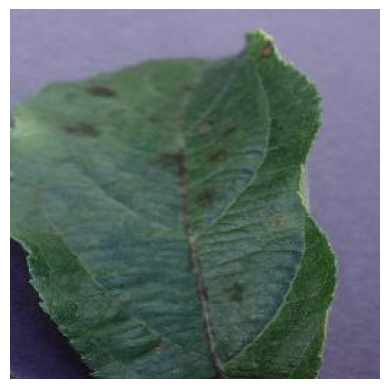

In [16]:
img_path="/content/PlantVillage/train/Apple___Apple_scab/023123cb-7b69-4c9f-a521-766d7c8543bb___FREC_Scab 3487.JPG"
img=mpimg.imread(img_path)
print(img.shape)
plt.imshow(img)
plt.axis('off')
plt.show()

In [17]:
data_gen=ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
)

In [18]:
train_generator=data_gen.flow_from_directory(
    directory="/content/PlantVillage/train",
    target_size=(224,224),
    batch_size=32,
    subset='training',
    class_mode='categorical'
)

Found 34771 images belonging to 38 classes.


In [19]:
val_generator=data_gen.flow_from_directory(
    directory="/content/PlantVillage/train",
    target_size=(224,224),
    batch_size=32,
    subset='validation',
    class_mode='categorical'
)

Found 8673 images belonging to 38 classes.


In [20]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(224,224,3)))   #32 kernal(filter) of size 3*3
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(38,activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [21]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,805,158 (182.36 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

In [22]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [23]:
print(len(train_generator))
print(train_generator.samples/32)

1087
1086.59375


In [24]:
history=model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=4,
    validation_data=val_generator,
    validation_steps=len(val_generator)
)

Epoch 1/4


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1087/1087 ━━━━━━━━━━━━━━━━━━━━ 86s 73ms/step - accuracy: 0.5408 - loss: 2.0777 - val_accuracy: 0.8358 - val_loss: 0.5453
Epoch 2/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9018 - loss: 0.3162 - val_accuracy: 0.8490 - val_loss: 0.5069
Epoch 3/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 70s 64ms/step - accuracy: 0.9597 - loss: 0.1263 - val_accuracy: 0.8577 - val_loss: 0.5428
Epoch 4/4
1087/1087 ━━━━━━━━━━━━━━━━━━━━ 69s 64ms/step - accuracy: 0.9730 - loss: 0.0850 - val_accuracy: 0.8360 - val_loss: 0.7371


In [25]:
val_loss,val_acc=model.evaluate(val_generator,steps=len(val_generator))
print(val_loss,val_acc)

272/272 ━━━━━━━━━━━━━━━━━━━━ 12s 44ms/step - accuracy: 0.8401 - loss: 0.7292
0.7370670437812805 0.8360428810119629
